In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [5]:
B = 377.461621
Bl = 4.61883951
V0 = 195.190490

vol = np.linspace(90, 225, 100)
P = np.zeros(np.size(V));
P[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in V]

pressure = np.zeros(np.size(vol));
pressure[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in vol]

fig = plt.figure(figsize=(6,4.5),dpi=150)
plt.plot(pressure,c_over_a_fit(vol))
plt.plot(P,c_over_a, marker='s',ls='none')
plt.xlabel(r'Pressure (TPa)')
plt.ylabel(r'c/a ratio')
plt.show()

NameError: name 'c_over_a_fit' is not defined

<Figure size 900x675 with 0 Axes>

In [6]:
#fit c over a 
V = [90, 97, 103.5, 117, 130.5, 144, 157.5, 171, 184.5, 198, 211.5, 225]
Etot = []
c_over_a = [1.616942, 1.61288, 1.611336, 1.60841, 1.60810, 1.60765, 1.60960, 1.61041, 1.61138,\
           1.61250, 1.61185, 1.61035]
c_over_a_error = 1e-5*np.array([2,6,2.7,5,4,8,11,13,14,10,13,16])
c_over_a_func = np.polyfit(V,c_over_a,4)
c_over_a_fit = np.poly1d(c_over_a_func)


def plot_bands_gif(volume):
    #import files
    arquivo = './dos/Re_{0}_bandstructure.agr'.format(volume)
    with open(arquivo,'r') as f:
        lines = f.readlines()
    
    efermi = 0.0
    
    # get data from files
    bands = []
    acquiring_curve = False
    labels_points = []
    labels_coords = []
    
    for n, line in enumerate(lines):
        #get symmetry points labels and x coords
        if ('@     xaxis  tick major' in line) and (',' in line):
            labels_coords.append(float(line.split()[-1]))
            string = lines[n+1].split()[-1].strip('"').rstrip('"')
            if string == '\\xG\\f{}':
                string = '$\Gamma$'
            labels_points.append(string)
        
        #get curves
        if '@type xy' in lines[n-1]:
            acquiring_curve = True
            curve = []
            
        if '&'in line:
            acquiring_curve = False
            bands.append(curve)
            
            
        if acquiring_curve:
            curve.append([float(x) for x in line.split()])
    
    npbands = np.array(bands)
    npbands[:,:,1] = npbands[:,:,1]/27.2114 #convert eV to Ha
    
    
    #plot
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(20,14), dpi=100)
    ax1 = plt.subplot2grid((3,2),(0,0), rowspan = 2)
    #get x limits from data
    xmin,xmax = npbands[0,0,0],npbands[0,-1,0]
    
    #draw curves
    for i in range(np.shape(npbands)[0]):
        ax1.plot(npbands[i,:,0], npbands[i,:,1], color='C2')
    
    #get y limits for later
    #ymin,ymax = plt.ylim()
    ymin, ymax = 0.3, 2.9
    
    #draw fermi level
    ax1.plot([xmin,xmax], [efermi,efermi], color='k', alpha = 0.5, linestyle = '--')
    #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
    ax1.annotate('V = {0} bohr$^3$\nE$_F$ = {1}'.format(volume,efermi), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=14,
                 horizontalalignment='left',
                 verticalalignment='top')
    
    #draw high symmetry lines
    ax1.vlines(labels_coords, ymin, ymax, color='k', linewidth = 0.5)
    
    #adjust limits
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_ylabel('Energy (Ha)')
    
    #set positions and labels of x axis
    plt.xticks(labels_coords, labels = labels_points)
    
    #############################################################
    # c over a
    B = 377.461621
    Bl = 4.61883951
    V0 = 195.190490
    
    vol = np.linspace(90, 225, 100)
    P = np.zeros(np.size(V));
    P[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in V]
    
    pressure = np.zeros(np.size(vol));
    pressure[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in vol]
    
    ponto_pressao = (3*B*(volume/V0)**(-2./3)*(1-(volume/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(volume/V0)**(1./3))/2.))/1000
    
    ax2 = plt.subplot2grid((3,2), (0,1), rowspan = 2)
    ax2.plot(pressure,c_over_a_fit(vol))
    ax2.plot(ponto_pressao,c_over_a_fit(volume), marker = 'o', color = 'red')
    ax2.set_xlabel(r'Pressure (TPa)')
    ax2.set_ylabel(r'c/a ratio')
    
    #Plot DOS
    
    
    
    #plt.savefig(arquivo.split('.')[0]+'.pdf')
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}

Volumes = [90,117,130,144,157,171,198,211,225]
imageio.mimsave('./bands_ca.gif', [plot_bands_gif(i) for i in Volumes], fps=1)

FileNotFoundError: [Errno 2] No such file or directory: './dos/Re_90_bandstructure.agr'

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


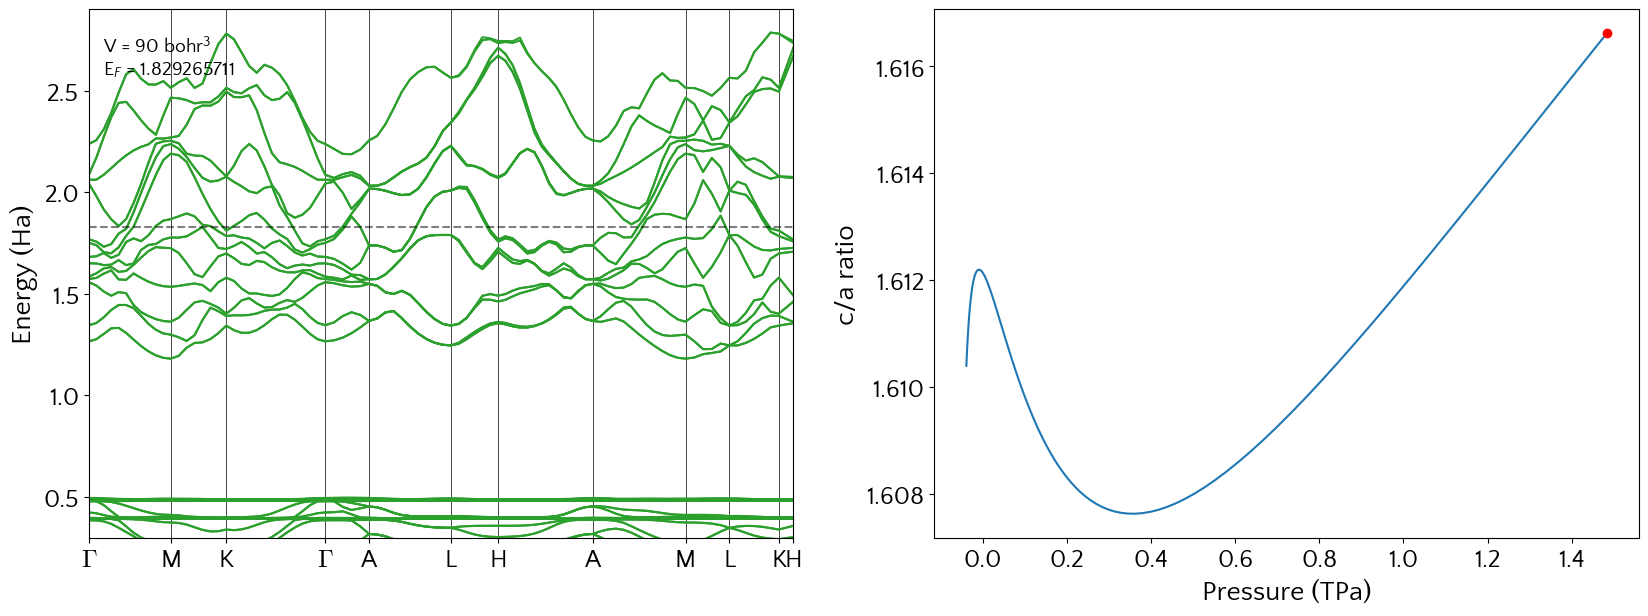

In [22]:
plot_bands_gif(90)

# Band Structure + DOS

## Functions that read xml files and return vectors with the DOS and band structure

In [11]:
def read_dos(volume):
    
    arquivo = './dos/dos_{0}.xml'.format(volume)
    with open(arquivo,'r') as f:
        lines = f.readlines()

    dos_s = []
    dos_p = []
    dos_d = []
    dos_f = []
    dos_g = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if ('</diagram>' in  line) and acquiring_curve:
            acquiring_curve = False
            #soma curva do orbital s
            if l==0:
                if len(dos_s)==0:
                    dos_s = np.zeros(np.shape(curve))
                    dos_s[:,0] = np.array(curve)[:,0]
                dos_s[:,1] = dos_s[:,1]+np.array(curve)[:,1]
                
            #soma curva do orbital p
            elif l==1:
                if len(dos_p)==0:
                    dos_p = np.zeros(np.shape(curve))
                    dos_p[:,0] = np.array(curve)[:,0]
                dos_p[:,1] = dos_p[:,1]+np.array(curve)[:,1]
                
            #soma curva do orbital d
            elif l==2:
                if len(dos_d)==0:
                    dos_d = np.zeros(np.shape(curve))
                    dos_d[:,0] = np.array(curve)[:,0]
                dos_d[:,1] = dos_d[:,1]+np.array(curve)[:,1]
            
            #soma curva do orbital f
            elif l==3:
                if len(dos_f)==0:
                    dos_f = np.zeros(np.shape(curve))
                    dos_f[:,0] = np.array(curve)[:,0]
                dos_f[:,1] = dos_f[:,1]+np.array(curve)[:,1]
                
            #soma curva do orbital g
            elif l==4:
                if len(dos_g)==0:
                    dos_g = np.zeros(np.shape(curve))
                    dos_g[:,0] = np.array(curve)[:,0]
                dos_g[:,1] = dos_g[:,1]+np.array(curve)[:,1]
            
        
        if acquiring_curve:
            a = line.split('"')
            curve.append([float(a[1]), float(a[3])])
        
        if '<diagram nspin="1"' in line:
            l = int(line.split()[-2].split('"')[-2])
            acquiring_curve = True
            curve = []
    
    total_dos = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if '<diagram type="totaldos" nspin="1">' in lines[n-1]:
            acquiring_curve = True
            curve = []
            
        if '</diagram>'in line and acquiring_curve:
            acquiring_curve = False
            total_dos.append(curve)
        if acquiring_curve:
            a = line.split('"')
            curve.append([float(a[1]), float(a[3])])
            
    
    total_dos = np.array(total_dos)
    #dos_up = total_dos[0,:,1]
    #dos_down = total_dos[1,:,1]
    #total_dos = np.array([total_dos[0,:,0], total_dos[0,:,1] + total_dos[1,:,1] ]).T #soma spin up(0) e down(1)
    total_dos = np.array([total_dos[0,:,0], total_dos[0,:,1] ]).T #somente spin up
    
    dos_inters = []
    acquiring_curve = False
    for n, line in enumerate(lines):
        #get curves
        if '<diagram type="interstitial" nspin="1">' in lines[n-1]:
            acquiring_curve = True
            curve = []
            
        if '</diagram>'in line and acquiring_curve:
            acquiring_curve = False
            dos_inters.append(curve)
        if acquiring_curve:
            a = line.split('"')
            curve.append([float(a[1]), float(a[3])])
            
    
    dos_inters = np.array(dos_inters)
    #dos_inters = np.array([dos_inters[0,:,0], dos_inters[0,:,1] + dos_inters[1,:,1] ]).T #soma spin up(0) e down(1)
    dos_inters = np.array([dos_inters[0,:,0], dos_inters[0,:,1]]).T #somente spin up
    
    return dos_s, dos_p, dos_d, dos_f, dos_g,total_dos, dos_inters

In [12]:
def read_bands(volume):
    arquivo = './band_structure/bandstructure_{0}.xml'.format(volume)

    with open(arquivo,'r') as f:
        lines = f.readlines()
    efermi = 0.0
    
    bands = []
    acquiring_curve = False
    symmetry_labels = []
    symmetry_coords = []
    
    for n, line in enumerate(lines):
        #get symmetry points labels and x coords
        if ('<vertex' in line):
            symmetry_coords.append(float(line.split('"')[1]))
            string = line.split('"')[7]
            if string == 'GAMMA':
                string = '$\Gamma$'
            symmetry_labels.append(string)
        
        #get curves
        if '<band>' in lines[n-1]:
            acquiring_curve = True
            curve = []
            
        if '</band>'in line:
            acquiring_curve = False
            bands.append(curve)
            
        if acquiring_curve:
            x = line.split('"')[1]
            y = line.split('"')[3]
            curve.append([float(x), float(y)])
    
    npbands = np.array(bands)
    return npbands, symmetry_coords, symmetry_labels

In [13]:
#fit c over a 
V = [90, 97, 103.5, 117, 130.5, 144, 157.5, 171, 184.5, 198, 211.5, 225]
Etot = []
c_over_a = [1.616942, 1.61288, 1.611336, 1.60841, 1.60810, 1.60765, 1.60960, 1.61041, 1.61138,\
           1.61250, 1.61185, 1.61035]
c_over_a_error = 1e-5*np.array([2,6,2.7,5,4,8,11,13,14,10,13,16])
c_over_a_func = np.polyfit(V,c_over_a,4)
c_over_a_fit = np.poly1d(c_over_a_func)


def plot_bands_dos_covera(volume):
    
    efermi = 0.0
    
    npbands, symmetry_coords, symmetry_labels = read_bands(volume)
    dos_s, dos_p, dos_d, dos_f, dos_g, total_dos, dos_inters = read_dos(volume)
    
    #plot
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(12,10), dpi=100)
    
    #Pega limites de energia
    ymax = total_dos[-1,0]
    ymin = total_dos[0,0]
    
    #ESTRUTURA DE BANDAS
    ax1 = plt.subplot2grid((3,5),(0,0), colspan = 4, rowspan = 2)
    #get x limits from data
    xmin,xmax = npbands[0,0,0],npbands[0,-1,0]
    
    #draw curves
    for i in range(np.shape(npbands)[0]):
        ax1.plot(npbands[i,:,0], npbands[i,:,1], color='C2')
    
    
    #draw fermi level
    ax1.plot([xmin,xmax], [efermi,efermi], color='k', alpha = 0.5, linestyle = '--')
    #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
    ax1.annotate('V = {0} bohr$^3$'.format(volume), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=14,
                 horizontalalignment='left',
                 verticalalignment='top')
    
    #draw high symmetry lines
    ax1.vlines(symmetry_coords, ymin, ymax, color='k', linewidth = 0.5)
    
    #adjust limits
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_ylabel('Energy (Ha)')
    
    #set positions and labels of x axis
    ax1.set_xticks(symmetry_coords)
    ax1.set_xticklabels(symmetry_labels)
    #############################################################
    #DENSITY OF STATES
    xmin_dos = 0.0001
    xmax_dos = 100.0
    
    ax2 = plt.subplot2grid((3,5),(0,4), rowspan = 2, sharey = ax1)
    ax2.plot(total_dos[:,1], total_dos[:,0], color = 'C7', label = 'Total')
    ax2.fill_between(total_dos[:,1],total_dos[:,0],alpha=0.2, color = 'C7')
    ax2.plot(dos_inters[:,1], dos_inters[:,0], color = 'C4', label='Interstitial')
    ax2.plot(dos_s[:,1]+dos_p[:,1]+dos_d[:,1]+dos_f[:,1]+dos_g[:,1], total_dos[:,0],
         color = 'C1', label = '$\Sigma_\ell$')
    ax2.tick_params(axis = 'y', direction = 'in')
    ax2.hlines(efermi,xmin_dos,xmax_dos, color='k', alpha = 0.5, linestyle = '--')
    ax2.set_xlabel('DOS')
    ax2.set_xlim(xmin_dos, xmax_dos)
    ax2.legend(fontsize=14)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    #############################################################
    # c over a
    B = 377.461621
    Bl = 4.61883951
    V0 = 195.190490
    
    vol = np.linspace(90, 225, 100)
    P = np.zeros(np.size(V));
    P[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in V]
    
    pressure = np.zeros(np.size(vol));
    pressure[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in vol]
    
    ponto_pressao = (3*B*(volume/V0)**(-2./3)*(1-(volume/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(volume/V0)**(1./3))/2.))/1000
    
    ax3 = plt.subplot2grid((3,5), (2,0), colspan = 4)
    ax3.plot(pressure,c_over_a_fit(vol))
    ax3.plot(ponto_pressao,c_over_a_fit(volume), marker = 'o', color = 'red')
    ax3.set_xlabel(r'Pressure (TPa)')
    ax3.set_ylabel(r'c/a ratio')
    
    plt.subplots_adjust(wspace=0.05)
    plt.show()

In [14]:
V = [90, 97, 103.5, 117, 130.5, 144, 157.5, 171, 184.5, 198, 211.5, 225]

B = 377.461621
Bl = 4.61883951
V0 = 195.190490

l = []
for volume in V:
    l.append(1000*(3*B*(volume/V0)**(-2./3)*(1-(volume/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(volume/V0)**(1./3))/2.))/1000)
l
    

[1483.2651030565926,
 1160.1013590271375,
 927.1522222697382,
 585.310710477739,
 367.7586683000413,
 225.6902510628308,
 131.15793983764408,
 67.44568527402623,
 24.192046760721063,
 -5.218886927673813,
 -25.118133803670915,
 -38.40149267863984]

In [7]:
plot_bands_dos_covera(198)

IndexError: list index out of range

## DOS + Bandstructure separated by $\ell$

In [7]:
import xml.etree.ElementTree as ET
def read_bands_Ldiff(volume):
    
    tree = ET.parse('./band_structure/bandstructure_{0}.xml'.format(volume))
    bandstrucutre = tree.getroot()
    bands = bandstrucutre.getchildren()[1].getchildren()[0].getchildren() #todas as bandas do 1o atomo
    
    #lista de dicionarios. Cada dicionario e uma banda
    lista_bandas = []
    for band in bands:
        distance = np.array([float(i.get('distance')) for i in band.getchildren()])
        energy = np.array([float(i.get('eval')) for i in band.getchildren()])
        suml = np.array([float(i.get('sum')) for i in band.getchildren()])
        inters = np.array([1-float(i.get('sum')) for i in band.getchildren()])
        s = np.array([float(i.getchildren()[0].get('character')) for i in band.getchildren()])
        p = np.array([float(i.getchildren()[1].get('character')) for i in band.getchildren()])
        d = np.array([float(i.getchildren()[2].get('character')) for i in band.getchildren()])
        f = np.array([float(i.getchildren()[3].get('character')) for i in band.getchildren()])
        banda = {'distance': np.array(distance),
                 'energy'  : np.array(energy),
                 'sum'     : np.array(suml),
                 'inters'  : np.array(inters),
                 's'       : np.array(s),
                 'p'       : np.array(p),
                 'd'       : np.array(d),
                 'f'       : np.array(f)}
        lista_bandas.append(banda)
    
        
    vertice_labels = []
    vertice_coords = []
    for vertice in bandstrucutre.findall('vertex'):
        vertice_coords.append(float(vertice.get('distance')))
        label = vertice.get('label')
        if label == 'GAMMA':
            label = '$\Gamma$'
        vertice_labels.append(label)
    return lista_bandas, vertice_coords, vertice_labels

In [16]:
#fit c over a 
V = [90, 97, 103.5, 117, 130.5, 144, 157.5, 171, 184.5, 198, 211.5, 225]
Etot = []
c_over_a = [1.616942, 1.61288, 1.611336, 1.60841, 1.60810, 1.60765, 1.60960, 1.61041, 1.61138,\
           1.61250, 1.61185, 1.61035]
c_over_a_error = 1e-5*np.array([2,6,2.7,5,4,8,11,13,14,10,13,16])
c_over_a_func = np.polyfit(V,c_over_a,4)
c_over_a_fit = np.poly1d(c_over_a_func)


def plot_bandsdiffL_dos_covera(volume):
    
    efermi = 0.0
    
    lista_bandas, vertice_coords, vertice_labels = read_bands_Ldiff(volume)
    dos_s, dos_p, dos_d, dos_f, dos_g, total_dos, dos_inters = read_dos(volume)
    
    #plot
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(12,10), dpi=100)
    
    #Pega limites de energia
    ymax = total_dos[-1,0]
    ymin = total_dos[0,0]
    
    #####################################################################
    #ESTRUTURA DE BANDAS
    ax1 = plt.subplot2grid((3,5),(0,0), colspan = 4, rowspan = 2)
    
    #get x limits from data
    xmin,xmax = lista_bandas[0]['distance'][0],lista_bandas[0]['distance'][-1]

    
    #draw curves
    for banda in lista_bandas:
        curve_list = []
        alpha_geral = 0.3
        multiplier = 0.08
        ax1.plot(banda['distance'], banda['energy'], color='grey', lw=0.1, alpha=0.5)
        
        orbitals = ['s', 'p', 'd', 'f']
        colors = ['C0', 'C3', 'lightgrey', 'C2', 'C4']
        for i in range(len(orbitals)):
            l = ax1.fill_between(banda['distance'],
                                  banda['energy']+multiplier*banda[orbitals[i]],
                                  banda['energy']-multiplier*banda[orbitals[i]],
                                  color=colors[i], alpha = alpha_geral, lw=0.0)
    
    for i in range(len(orbitals)):
            l = ax1.fill_between([-1], [1],[0], color=colors[i], alpha = 0.5, label=orbitals[i])
    ax1.legend(loc='upper right', ncol=2)

    
    
    #draw fermi level
    ax1.plot([xmin,xmax], [efermi,efermi], color='k', alpha = 0.5, linestyle = '--')
    #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
    ax1.annotate('V = {0} Bohr$^3$'.format(volume), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=14,
                 horizontalalignment='left',
                 verticalalignment='top')
    
    #draw high symmetry lines
    ax1.vlines(vertice_coords, ymin, ymax, color='k', linewidth = 0.5, alpha = 0.5)
    
    #adjust limits
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_ylabel('Energy (Ha)')
    
    #set positions and labels of x axis
    ax1.set_xticks(vertice_coords)
    ax1.set_xticklabels(vertice_labels)
    
    #############################################################
    #DENSITY OF STATES
    xmin_dos = 0.0001
    xmax_dos = 70.0
    
    ax2 = plt.subplot2grid((3,5),(0,4), rowspan = 2, sharey = ax1)
    ax2.plot(total_dos[:,1], total_dos[:,0], color = 'C7', label = 'Total')
    ax2.fill_between(total_dos[:,1],total_dos[:,0],alpha=0.2, color = 'C7')
    ax2.plot(dos_inters[:,1], dos_inters[:,0], color = 'C1', label='Interstitial')
    #ax2.plot(dos_s[:,1]+dos_p[:,1]+dos_d[:,1]+dos_f[:,1]+dos_g[:,1], total_dos[:,0],
    #     color = 'C1', label = '$\Sigma_\ell$')
    ax2.tick_params(axis = 'y', direction = 'in')
    ax2.hlines(efermi,xmin_dos,xmax_dos, color='k', alpha = 0.5, linestyle = '--')
    ax2.set_xlabel('DOS (a.u.)')
    ax2.set_xlim(xmin_dos, xmax_dos)
    ax2.legend(fontsize=14)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    #############################################################
    # c over a
    B = 377.461621
    Bl = 4.61883951
    V0 = 195.190490
    
    vol = np.linspace(90, 225, 100)
    P = np.zeros(np.size(V));
    P[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in V]
    
    pressure = np.zeros(np.size(vol));
    pressure[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in vol]
    
    ponto_pressao = (3*B*(volume/V0)**(-2./3)*(1-(volume/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(volume/V0)**(1./3))/2.))/1000
    
    ax3 = plt.subplot2grid((3,5), (2,0), colspan = 4)
    ax3.plot(pressure,c_over_a_fit(vol))
    ax3.plot(ponto_pressao,c_over_a_fit(volume), marker = 'o', color = 'red')
    ax3.set_xlabel(r'Pressure (TPa)')
    ax3.set_ylabel(r'c/a ratio')
    
    plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    #plt.savefig('./combined_plot_serie/combinedplot_{0}.svg'.format(volume))
    plt.savefig('./combined_plot_serie/combinedplot_{0}.pdf'.format(volume))
    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

In [37]:
#######################################################################
#               LIXO LIXO LIXO LIXO

#fit c over a 
V = [90, 97, 103.5, 117, 130.5, 144, 157.5, 171, 184.5, 198, 211.5, 225]
Etot = []
c_over_a = [1.616942, 1.61288, 1.611336, 1.60841, 1.60810, 1.60765, 1.60960, 1.61041, 1.61138,\
           1.61250, 1.61185, 1.61035]
c_over_a_error = 1e-5*np.array([2,6,2.7,5,4,8,11,13,14,10,13,16])
c_over_a_func = np.polyfit(V,c_over_a,4)
c_over_a_fit = np.poly1d(c_over_a_func)


def plot_bandsdiffL_dos_covera(volume):
    
    efermi = 0.0
    
    lista_bandas, vertice_coords, vertice_labels = read_bands_Ldiff(volume)
    dos_s, dos_p, dos_d, dos_f, dos_g, total_dos, dos_inters = read_dos(volume)
    
    #plot
    plt.rc('font', family='QuattroCento Sans')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('axes', labelsize=20)
    plt.rc('mathtext', rm='Quattrocento Sans',it='Quattrocento Sans:italic', bf='Quattrocento Sans:bold', fontset='custom' )
    
    fig = plt.figure(figsize=(12,8), dpi=100)
    
    #Pega limites de energia
    ymax = total_dos[-1,0]
    ymin = total_dos[0,0]
    
    #####################################################################
    #ESTRUTURA DE BANDAS
    ax1 = plt.subplot2grid((4,6),(0,0), colspan = 5, rowspan = 3)
    
    #get x limits from data
    xmin,xmax = lista_bandas[0]['distance'][0],lista_bandas[0]['distance'][-1]

    
    #draw curves
    for banda in lista_bandas:
        curve_list = []
        alpha_geral = 0.3
        multiplier = 0.08
        ax1.plot(banda['distance'], banda['energy'], color='grey', lw=0.1, alpha=0.5)
        
        orbitals = ['s', 'p', 'd', 'f']
        colors = ['C0', 'C3', 'lightgrey', 'C2', 'C4']
        for i in range(len(orbitals)):
            l = ax1.fill_between(banda['distance'],
                                  banda['energy']+multiplier*banda[orbitals[i]],
                                  banda['energy']-multiplier*banda[orbitals[i]],
                                  color=colors[i], alpha = alpha_geral, lw=0.0)
    
    for i in range(len(orbitals)):
            l = ax1.fill_between([-1], [1],[0], color=colors[i], alpha = 0.5, label=orbitals[i])
    ax1.legend(loc='upper right', ncol=2)

    
    
    #draw fermi level
    ax1.plot([xmin,xmax], [efermi,efermi], color='k', alpha = 0.5, linestyle = '--')
    #ax1.annotate('E$_\mathrm{F}$', xy = (0,ymax-4), fontsize=20)
    
    
    #draw high symmetry lines
    ax1.vlines(vertice_coords, ymin, ymax, color='k', linewidth = 0.5, alpha = 0.5)
    
    #adjust limits
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax1.set_ylabel('Energy (Ha)')
    
    #set positions and labels of x axis
    ax1.set_xticks(vertice_coords)
    ax1.set_xticklabels(vertice_labels)
    
    #############################################################
    #DENSITY OF STATES
    xmin_dos = 0.0001
    xmax_dos = 70.0
    
    ax2 = plt.subplot2grid((4,6),(0,5), rowspan = 3, sharey = ax1)
    ax2.plot(total_dos[:,1], total_dos[:,0], color = 'C7', label = 'Total')
    ax2.fill_between(total_dos[:,1],total_dos[:,0],alpha=0.2, color = 'C7')
    ax2.plot(dos_inters[:,1], dos_inters[:,0], color = 'C1', label='Interstitial')
    #ax2.plot(dos_s[:,1]+dos_p[:,1]+dos_d[:,1]+dos_f[:,1]+dos_g[:,1], total_dos[:,0],
    #     color = 'C1', label = '$\Sigma_\ell$')
    ax2.tick_params(axis = 'y', direction = 'in')
    ax2.hlines(efermi,xmin_dos,xmax_dos, color='k', alpha = 0.5, linestyle = '--')
    ax2.set_xlabel('DOS (a.u.)')
    ax2.set_xlim(xmin_dos, xmax_dos)
    ax2.legend(fontsize=14)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    #############################################################
    # c over a
    B = 377.461621
    Bl = 4.61883951
    V0 = 195.190490
    
    vol = np.linspace(90, 225, 100)
    P = np.zeros(np.size(V));
    P[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in V]
    
    pressure = np.zeros(np.size(vol));
    pressure[:] = [(3*B*(z/V0)**(-2./3)*(1-(z/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(z/V0)**(1./3))/2.))/1000. for z in vol]
    
    ponto_pressao = (3*B*(volume/V0)**(-2./3)*(1-(volume/V0)**(1./3))*np.exp(3.*(Bl-1)*(1.-(volume/V0)**(1./3))/2.))/1000
    
    ax3 = plt.subplot2grid((4,6), (3,0), colspan = 5)
    ax3.plot(pressure,c_over_a_fit(vol))
    ax3.plot(ponto_pressao,c_over_a_fit(volume), marker = 'o', color = 'red')
    ax3.set_xlabel(r'Pressure (TPa)')
    ax3.set_ylabel(r'c/a ratio')
    
    ax1.annotate('V = {0} Bohr$^3$\t P = {1:0.2f} GPa'.format(volume, ponto_pressao), 
                 xycoords = 'axes fraction', xy=(0.02, 0.95),
                 fontsize=20,
                 horizontalalignment='left',
                 verticalalignment='top')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05)
    plt.subplots_adjust(hspace=0.25)
    
    
    #plt.savefig('./combined_plot_serie/combinedplot_{0}.svg'.format(volume))
    plt.savefig('./combined_plot_serie/combinedplot_{0}.pdf'.format(volume))
    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Substituting with a symbol from Computer Modern.


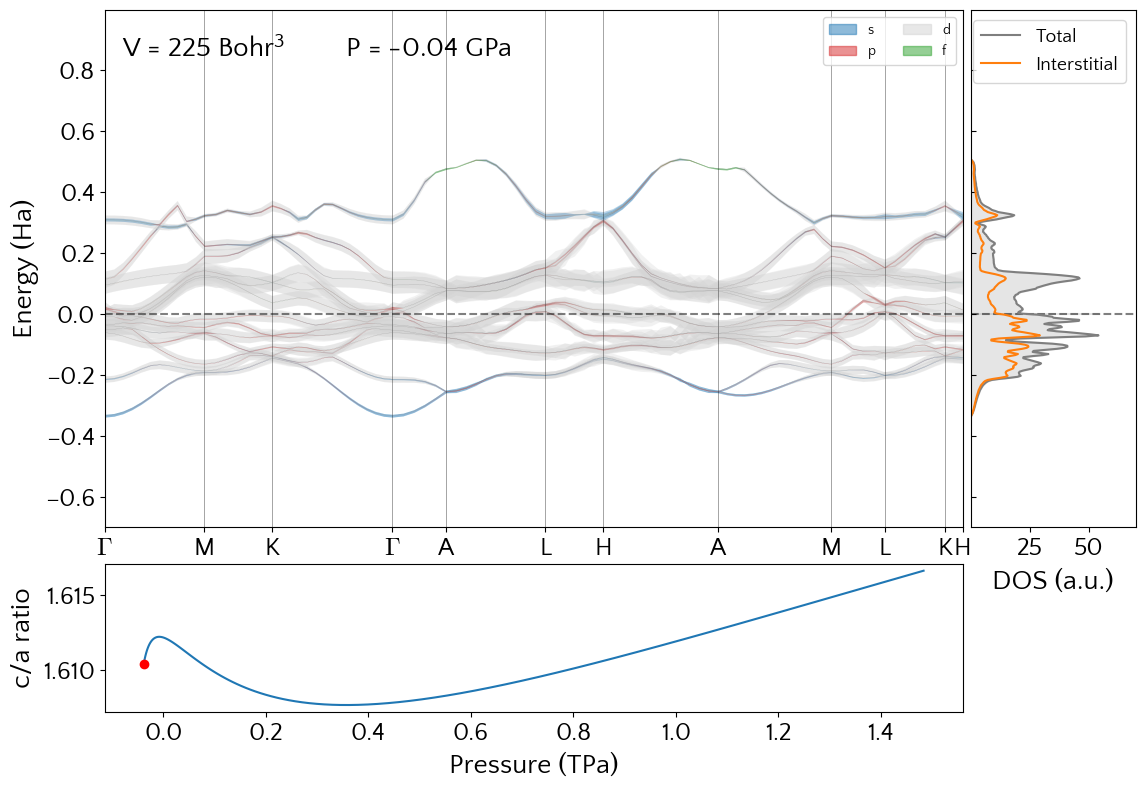

In [38]:
plot_bandsdiffL_dos_covera(225)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a 

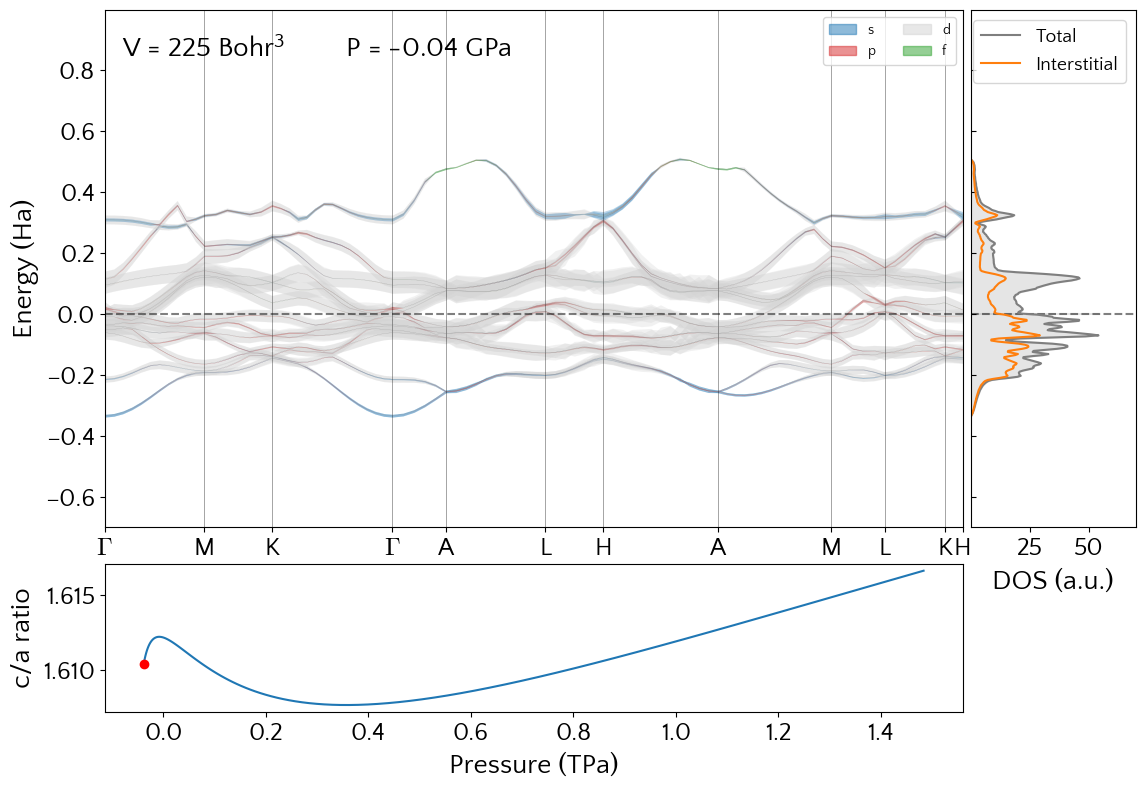

Substituting with a symbol from Computer Modern.


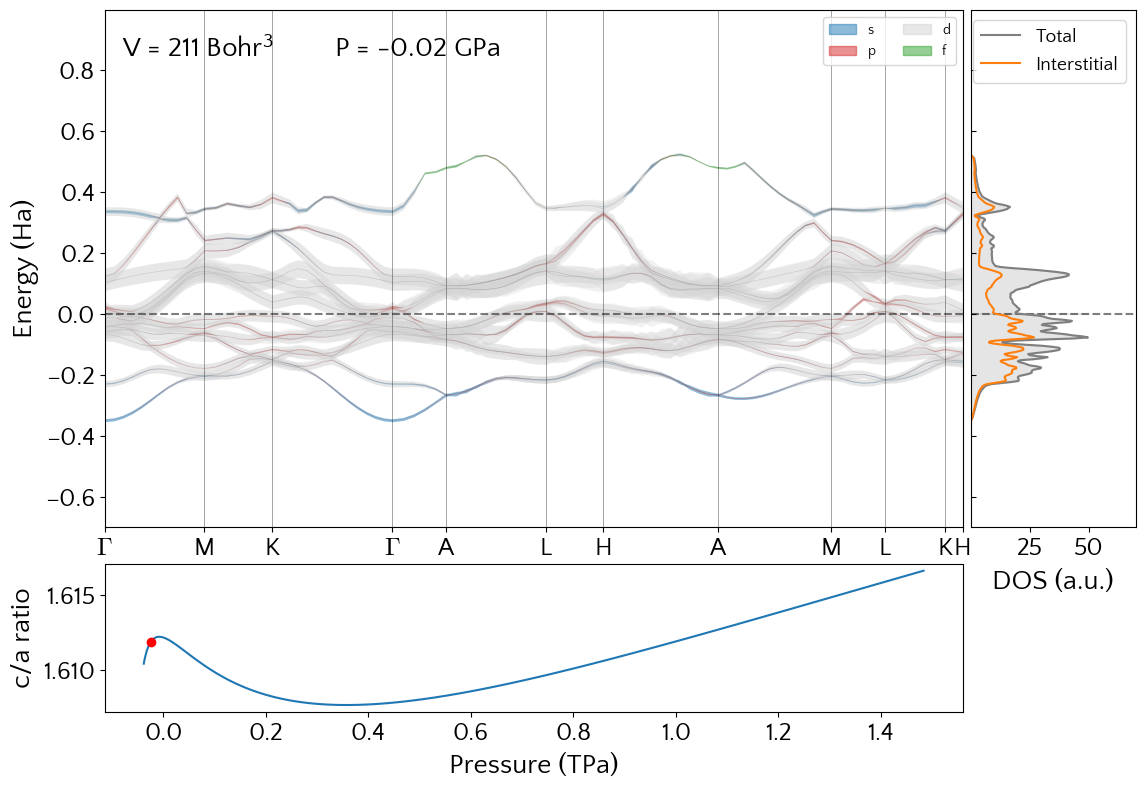

Substituting with a symbol from Computer Modern.


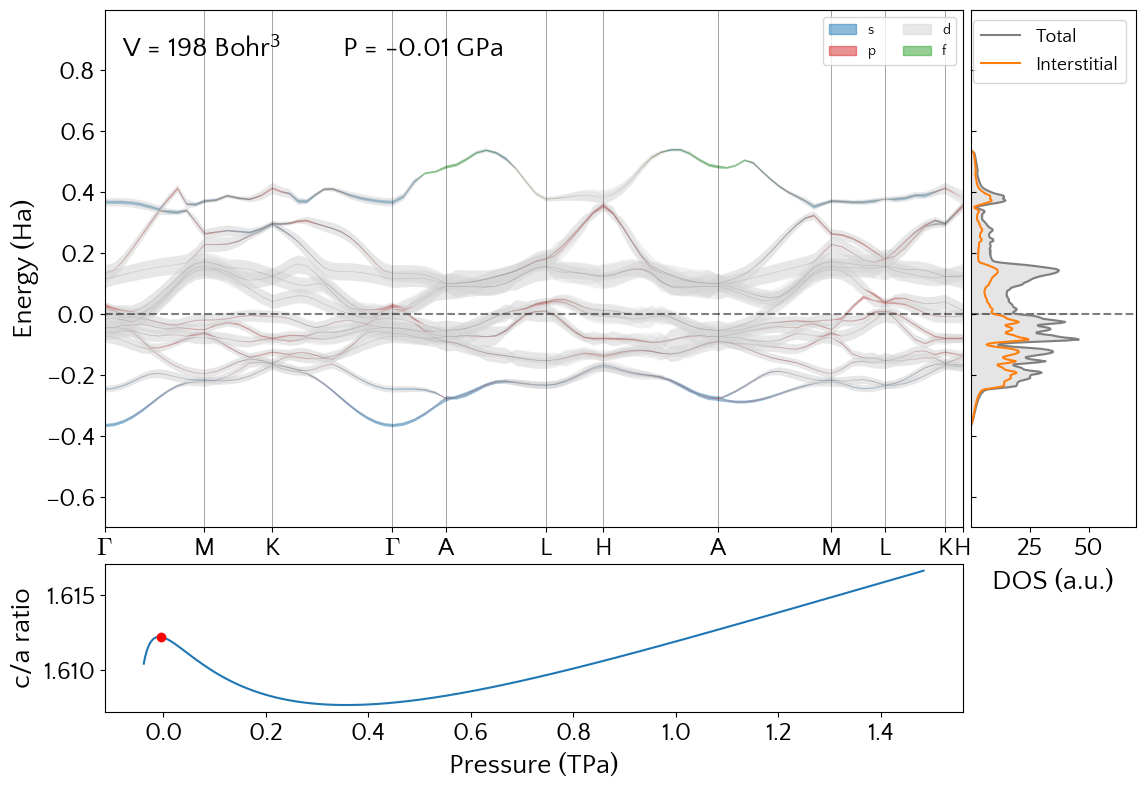

Substituting with a symbol from Computer Modern.


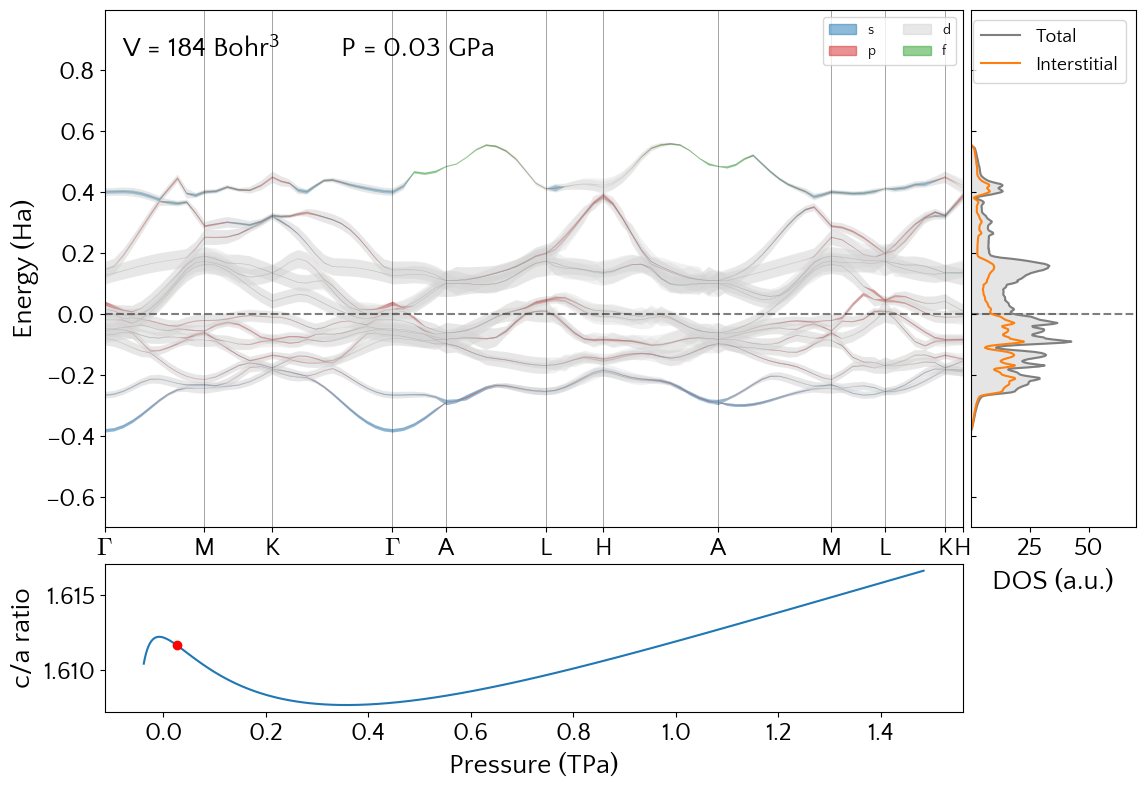

Substituting with a symbol from Computer Modern.


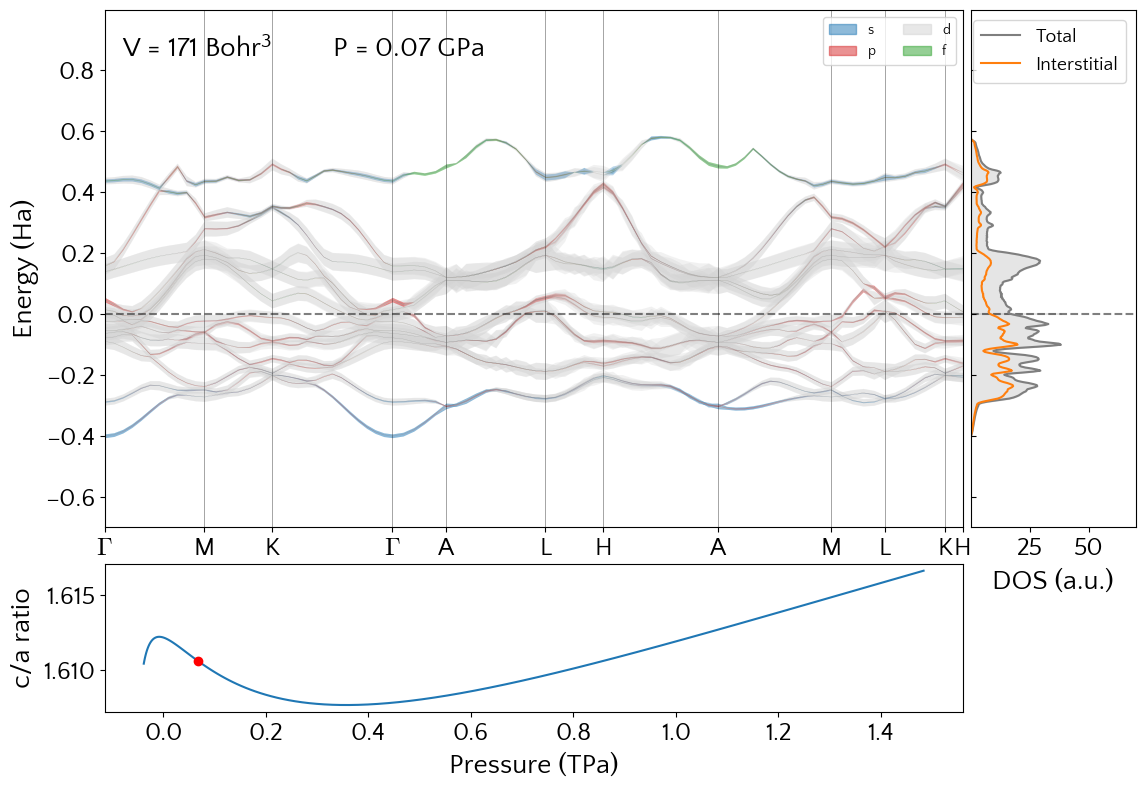

Substituting with a symbol from Computer Modern.


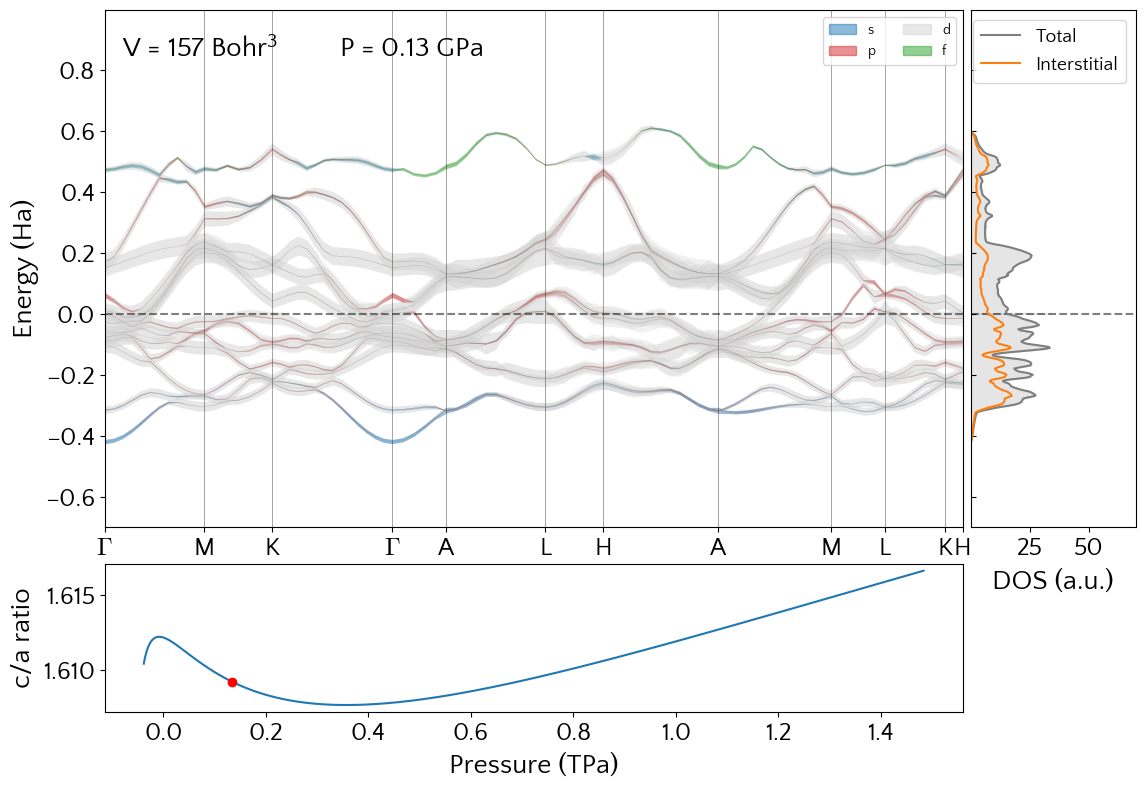

Substituting with a symbol from Computer Modern.


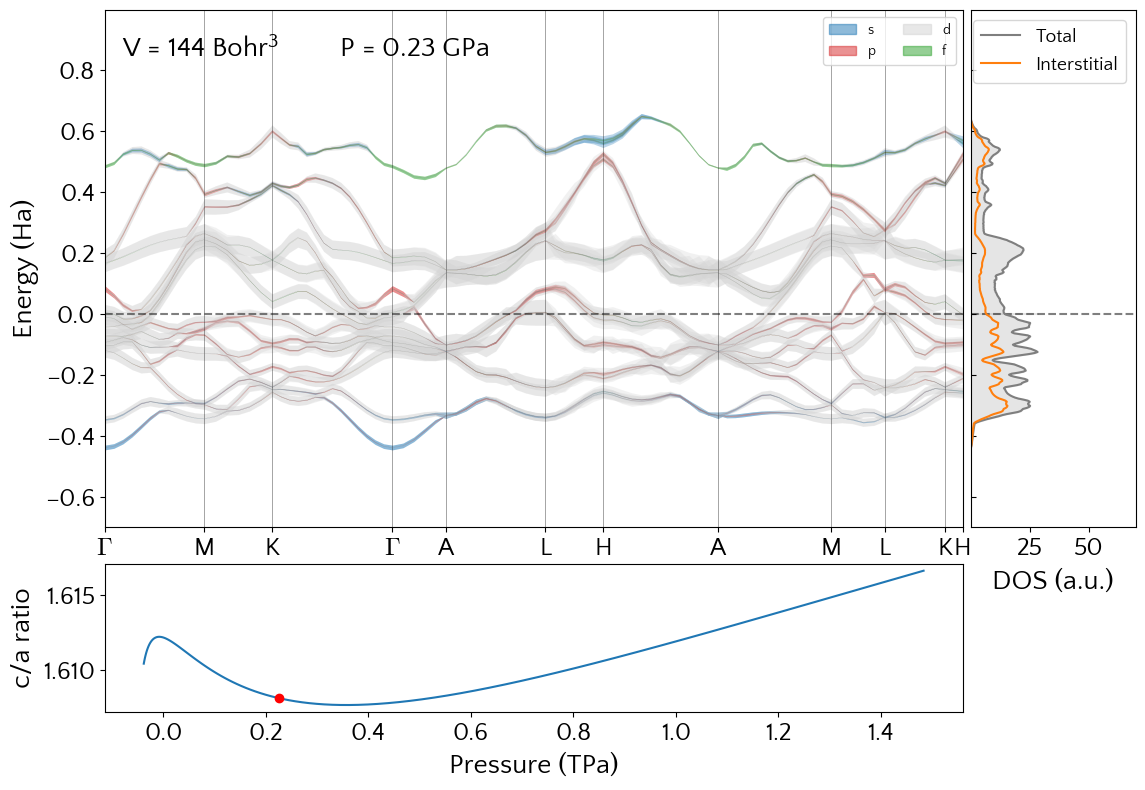

Substituting with a symbol from Computer Modern.


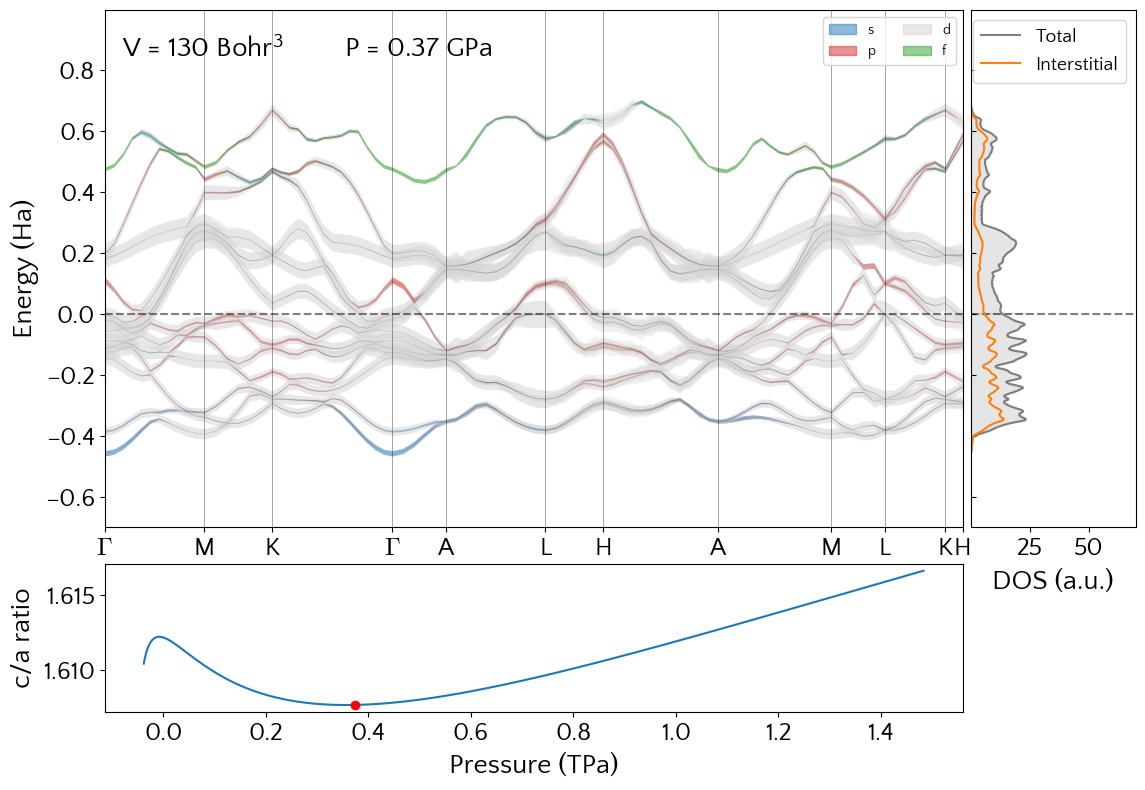

Substituting with a symbol from Computer Modern.


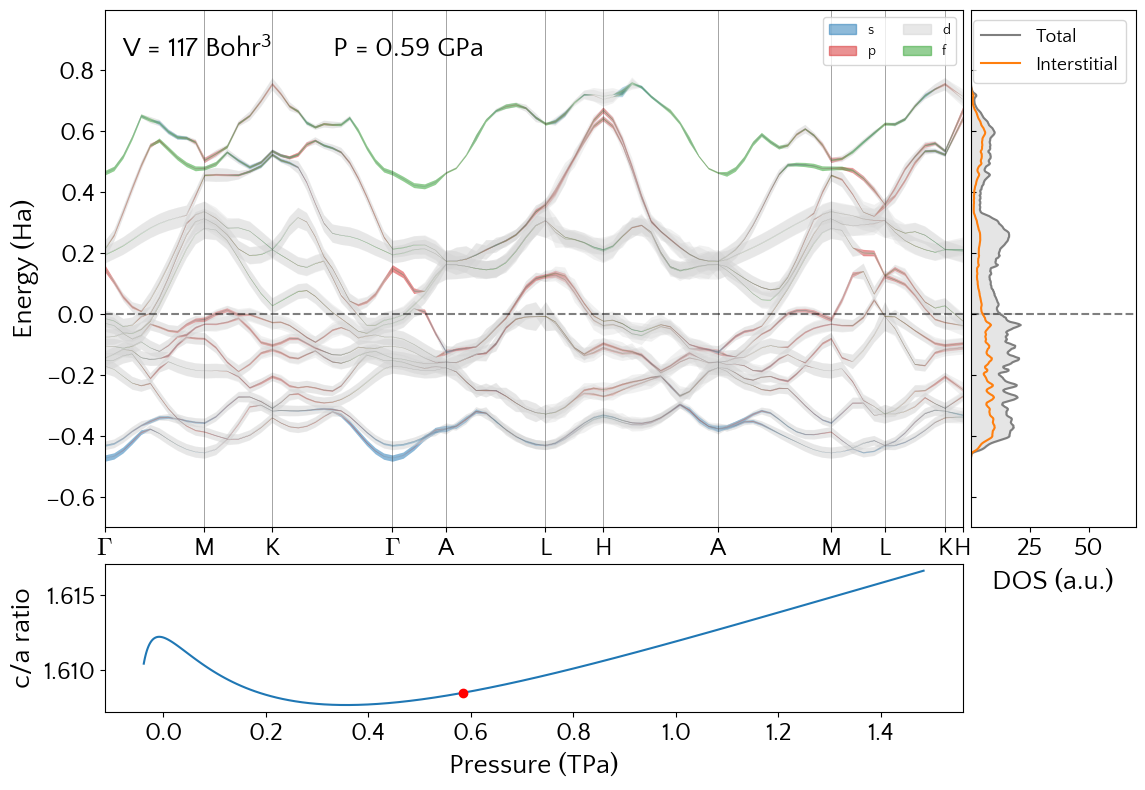

Substituting with a symbol from Computer Modern.


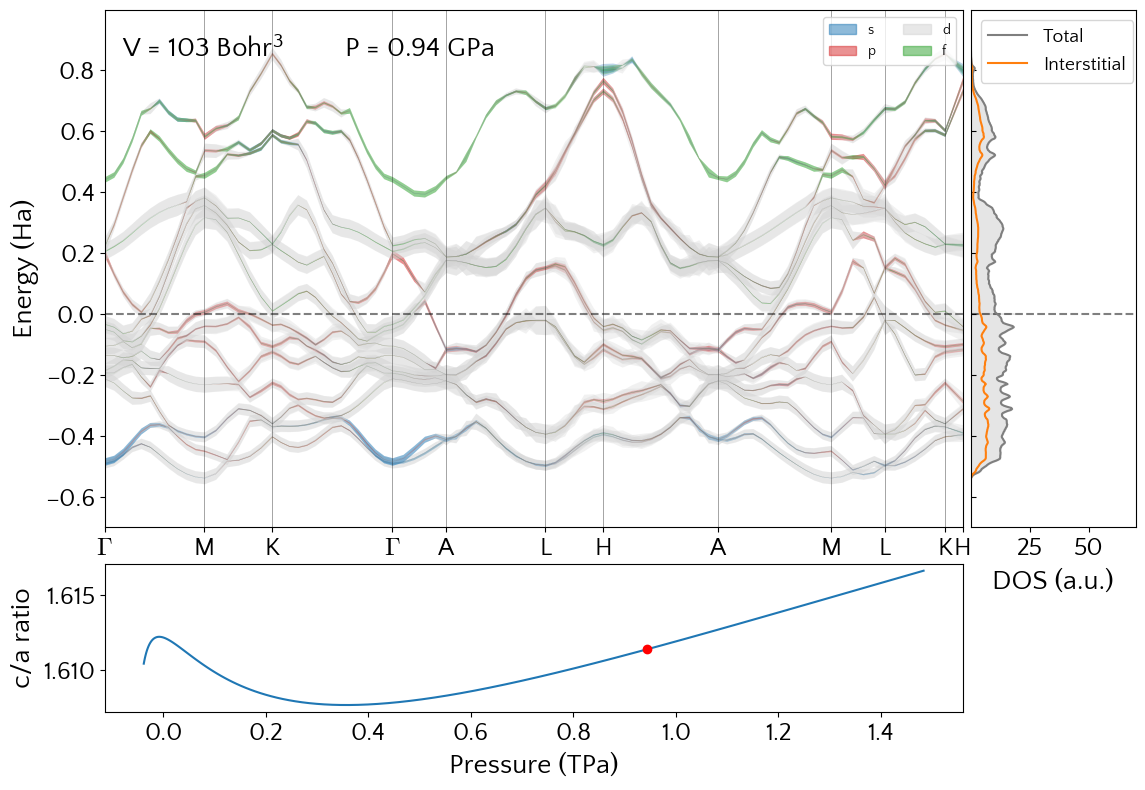

Substituting with a symbol from Computer Modern.


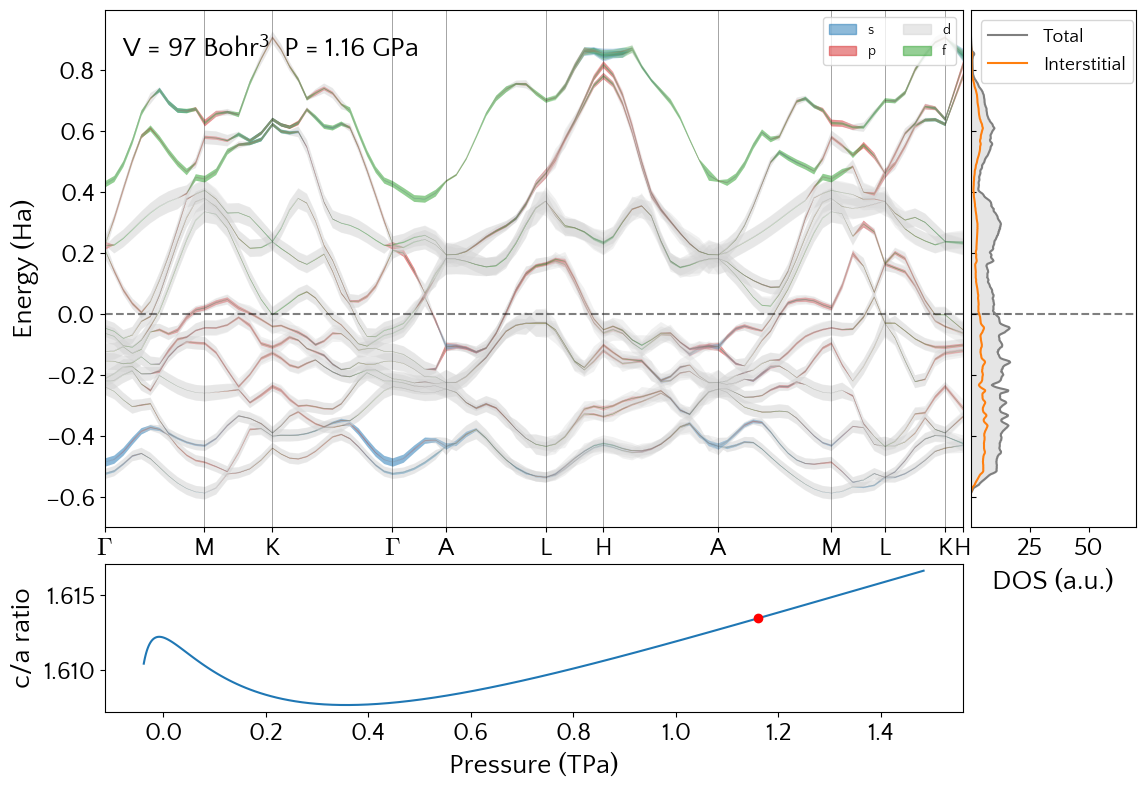

Substituting with a symbol from Computer Modern.


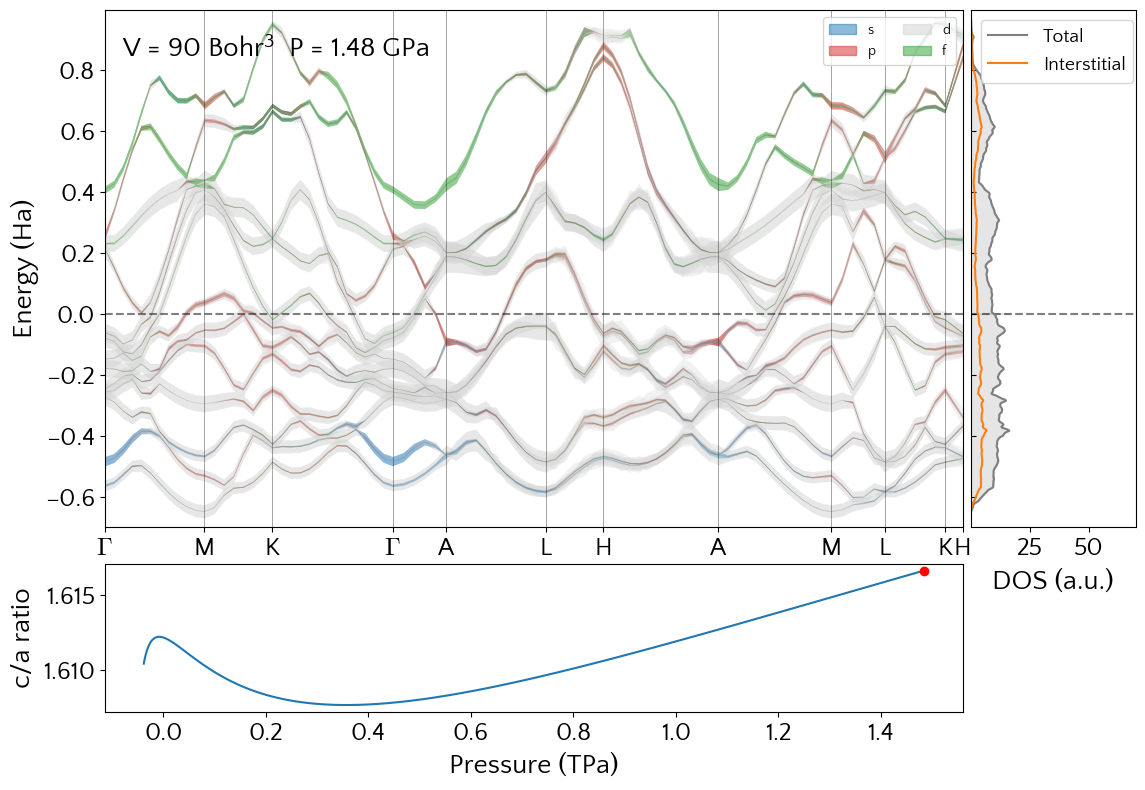

In [39]:
Volumes = [225, 211, 198, 184, 171, 157, 144, 130, 117, 103, 97, 90]

for v in Volumes:
    plot_bandsdiffL_dos_covera(v)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a 

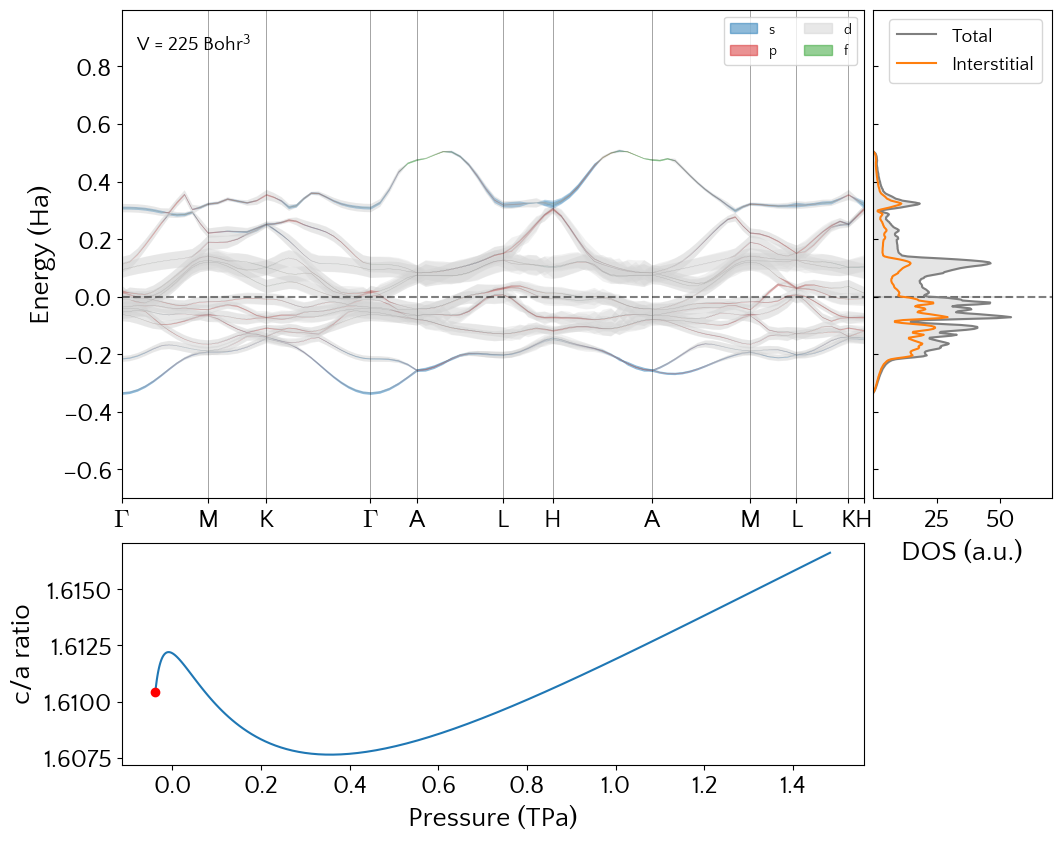

Substituting with a symbol from Computer Modern.


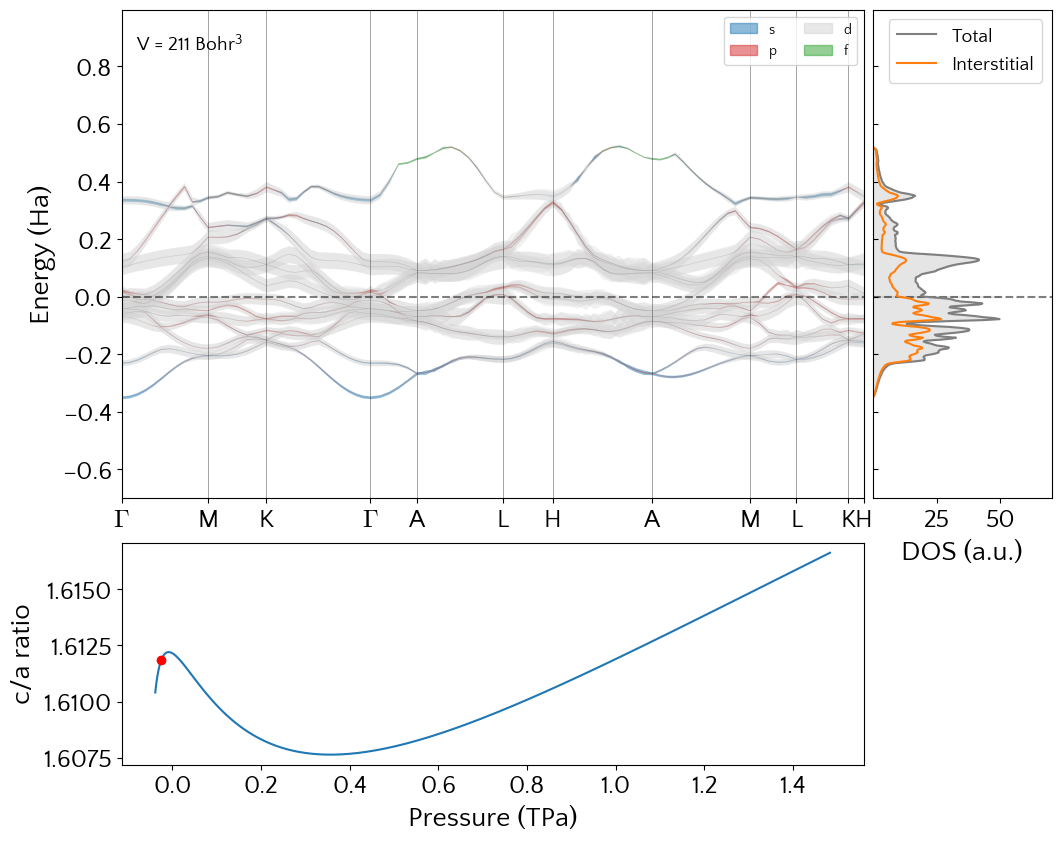

Substituting with a symbol from Computer Modern.


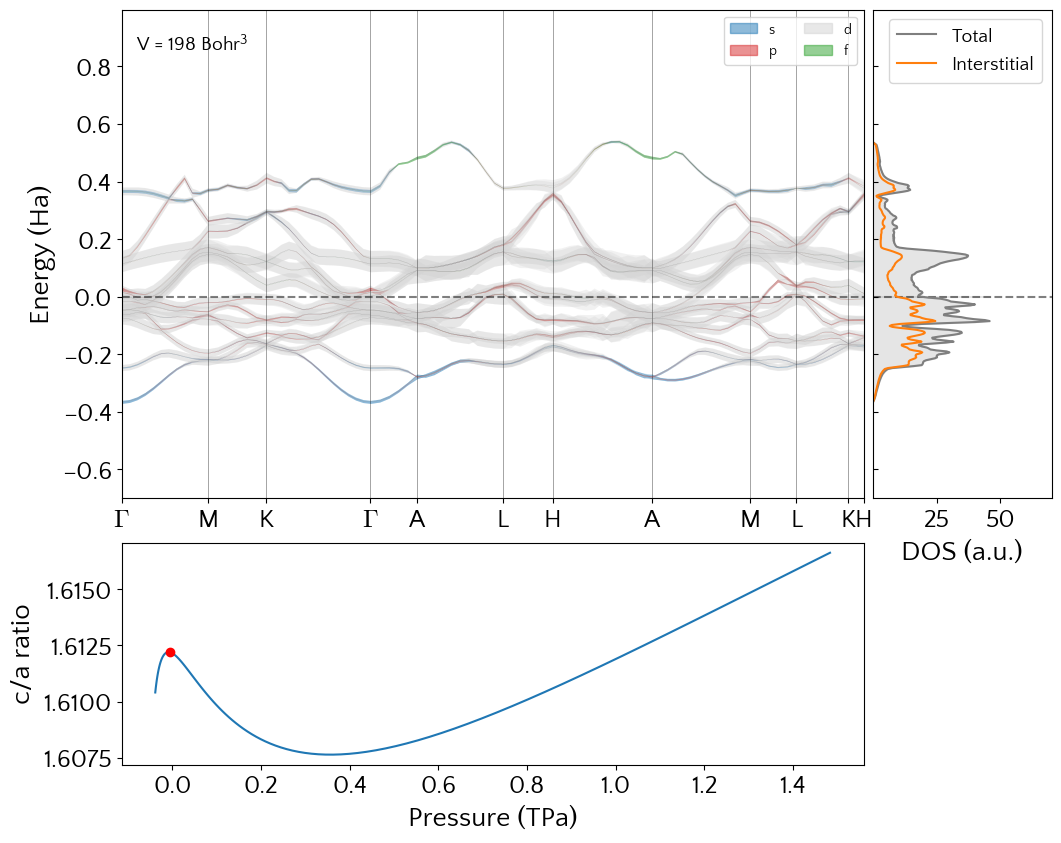

Substituting with a symbol from Computer Modern.


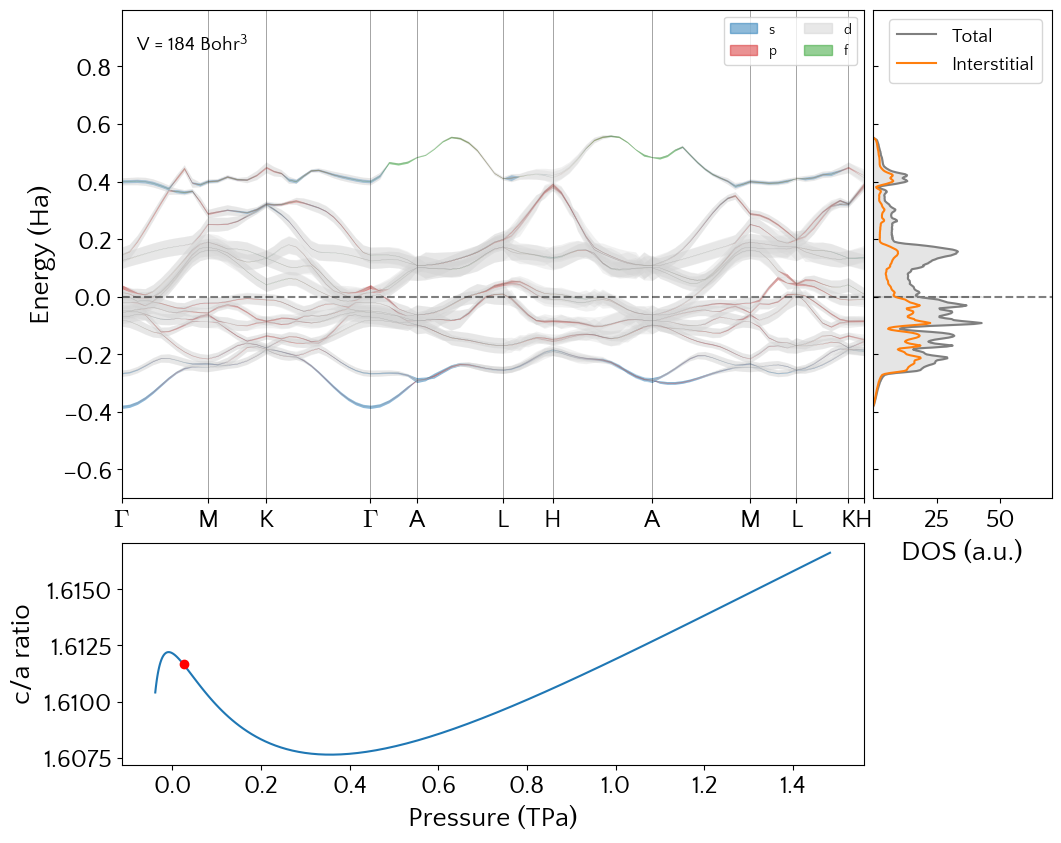

Substituting with a symbol from Computer Modern.


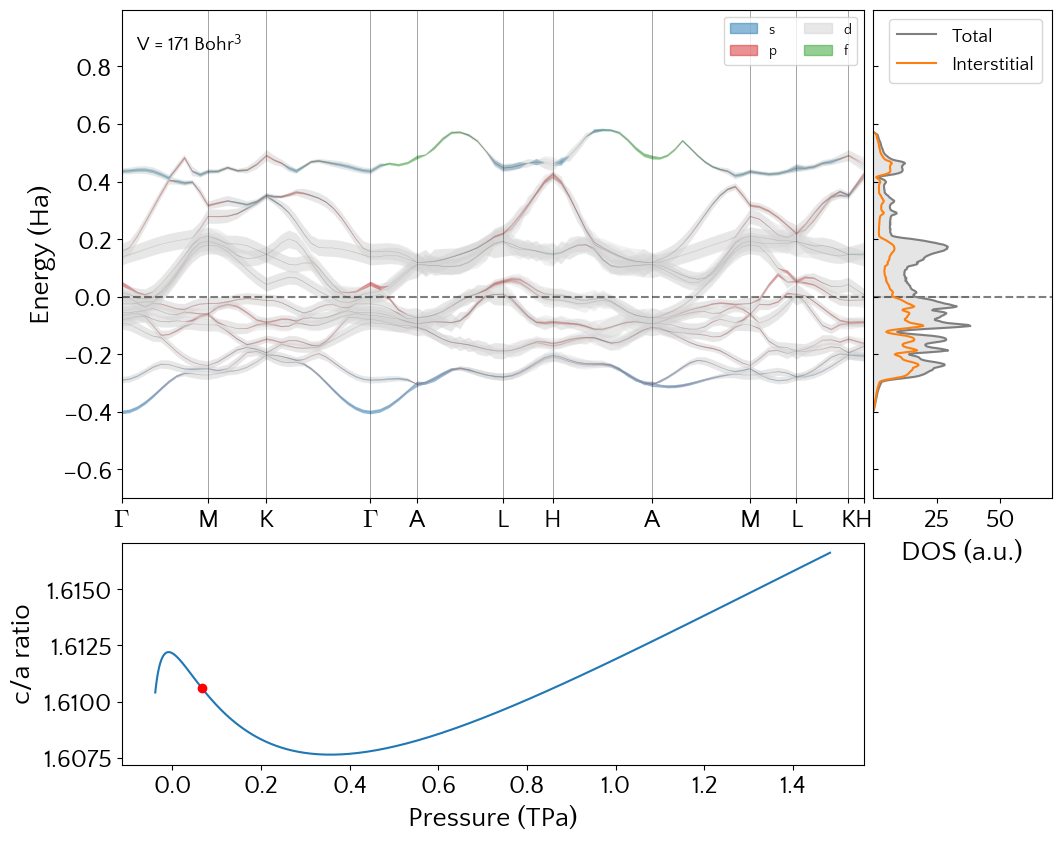

Substituting with a symbol from Computer Modern.


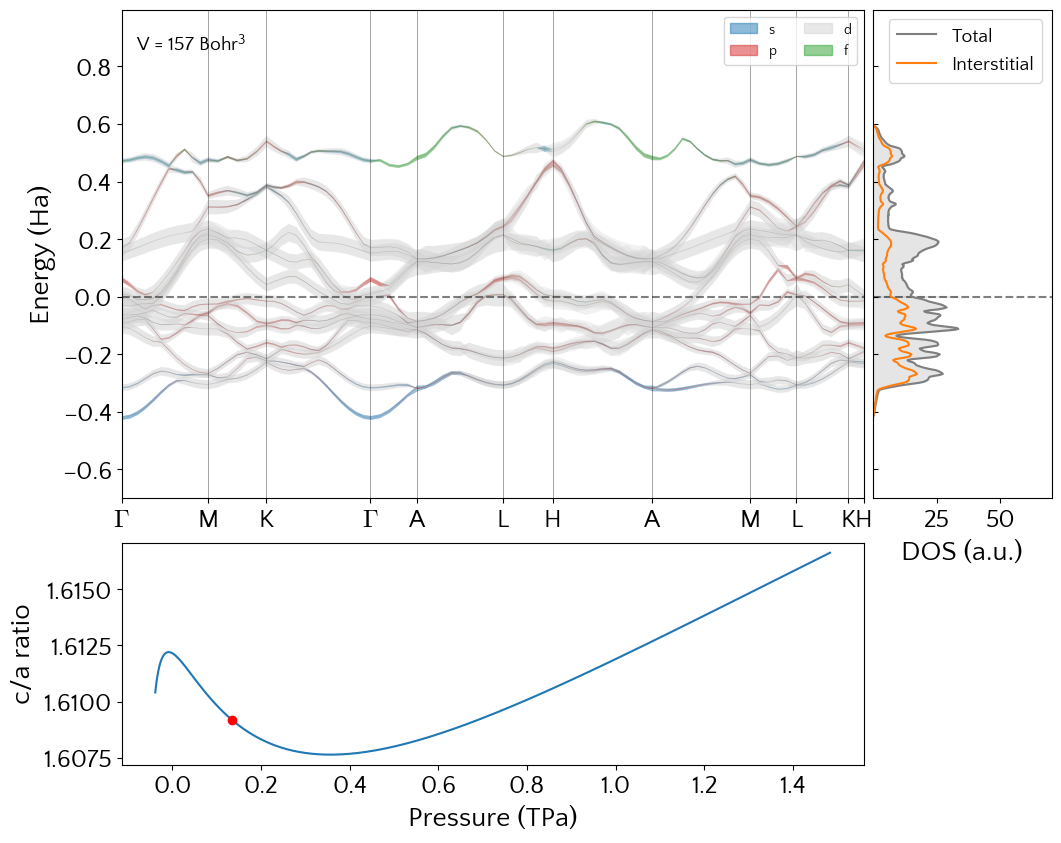

Substituting with a symbol from Computer Modern.


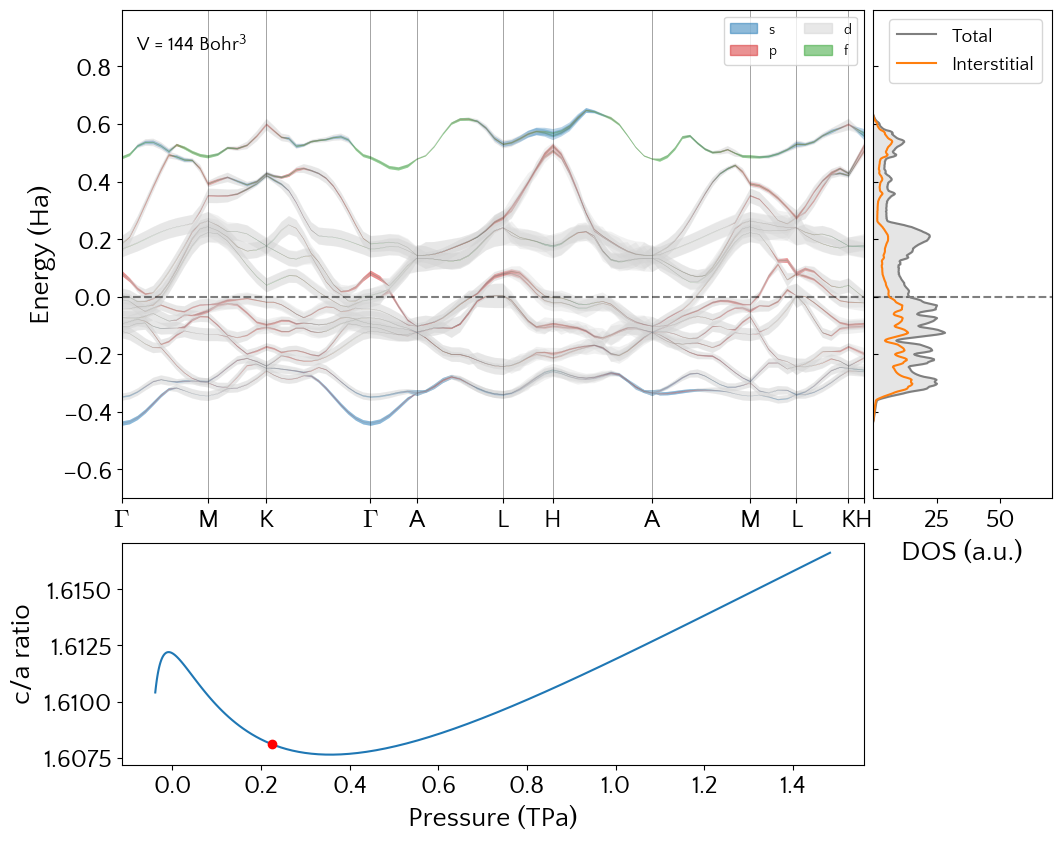

Substituting with a symbol from Computer Modern.


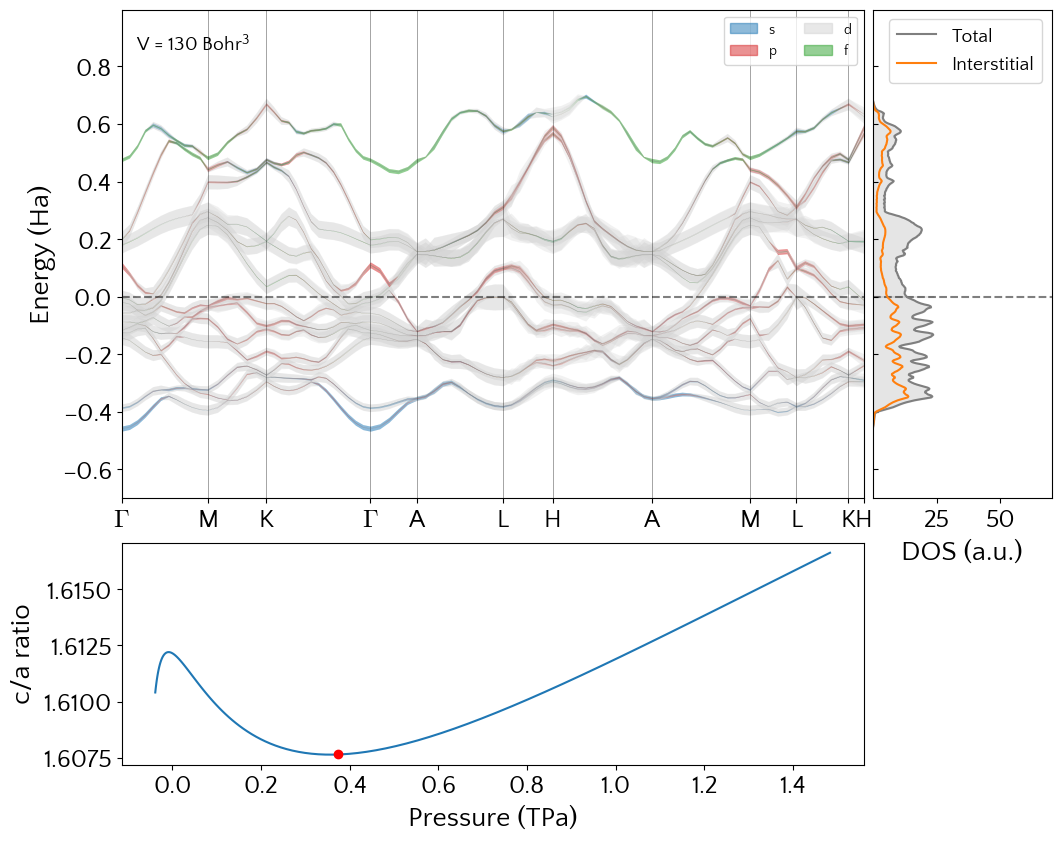

Substituting with a symbol from Computer Modern.


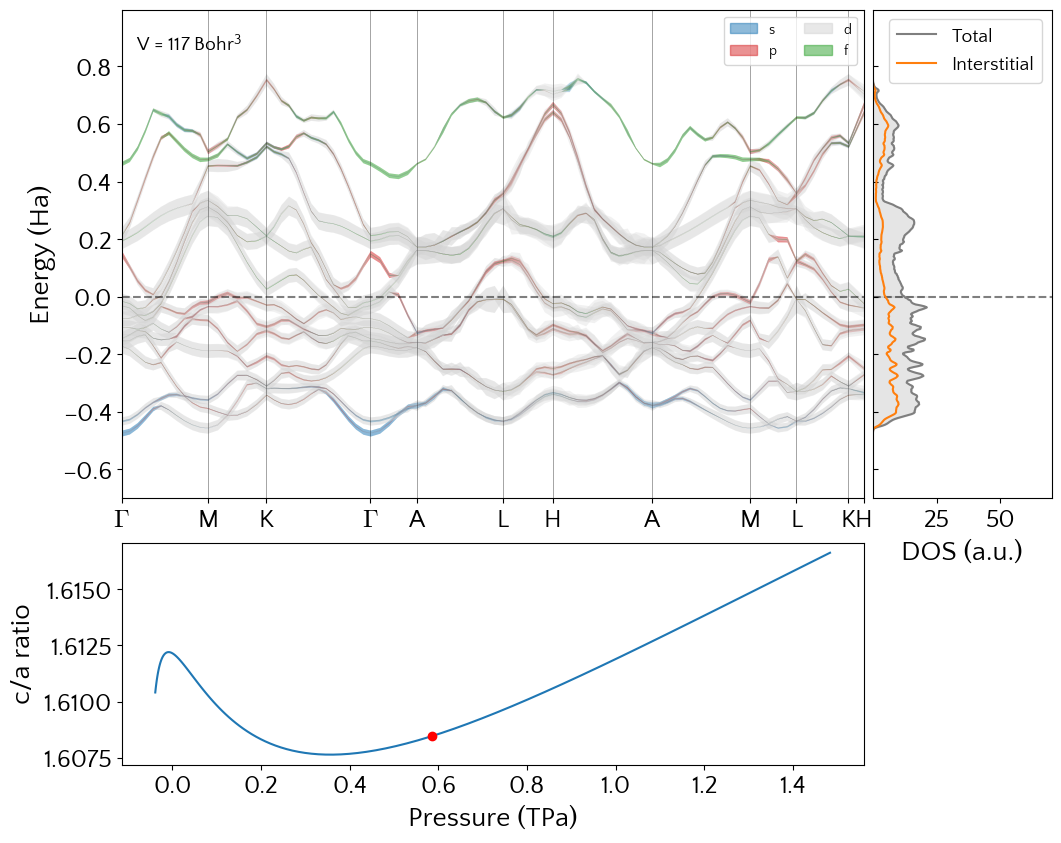

Substituting with a symbol from Computer Modern.


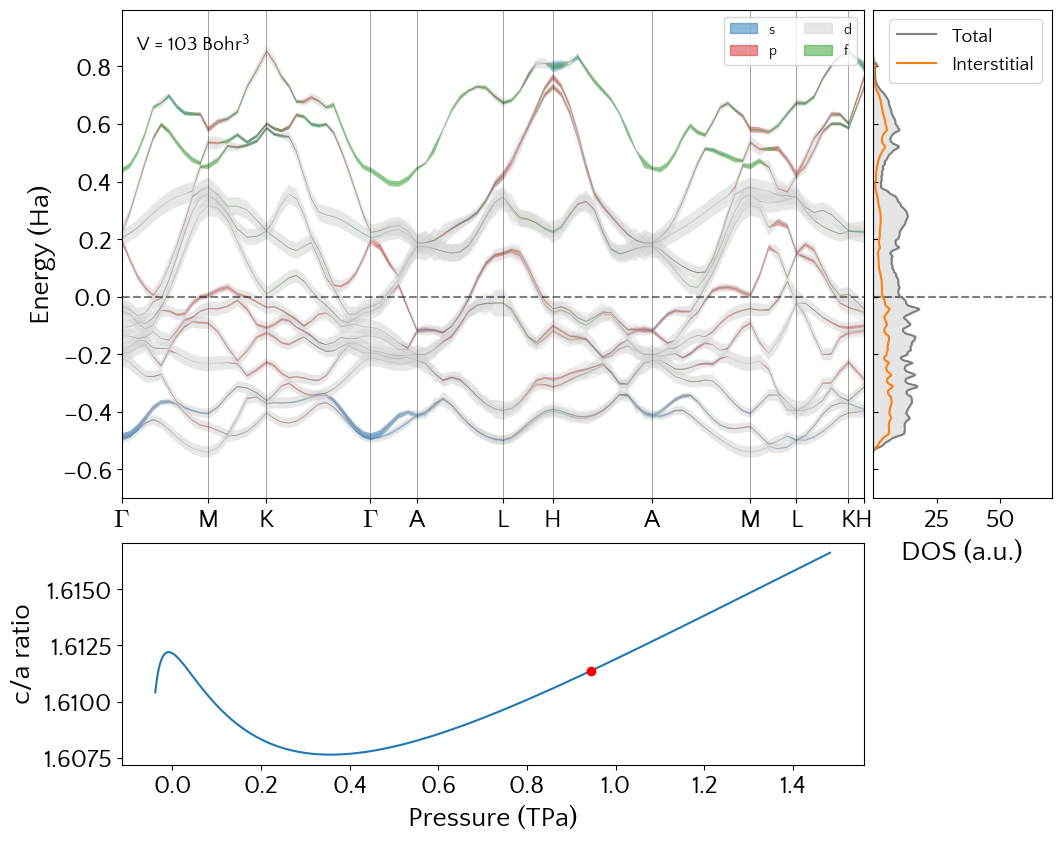

Substituting with a symbol from Computer Modern.


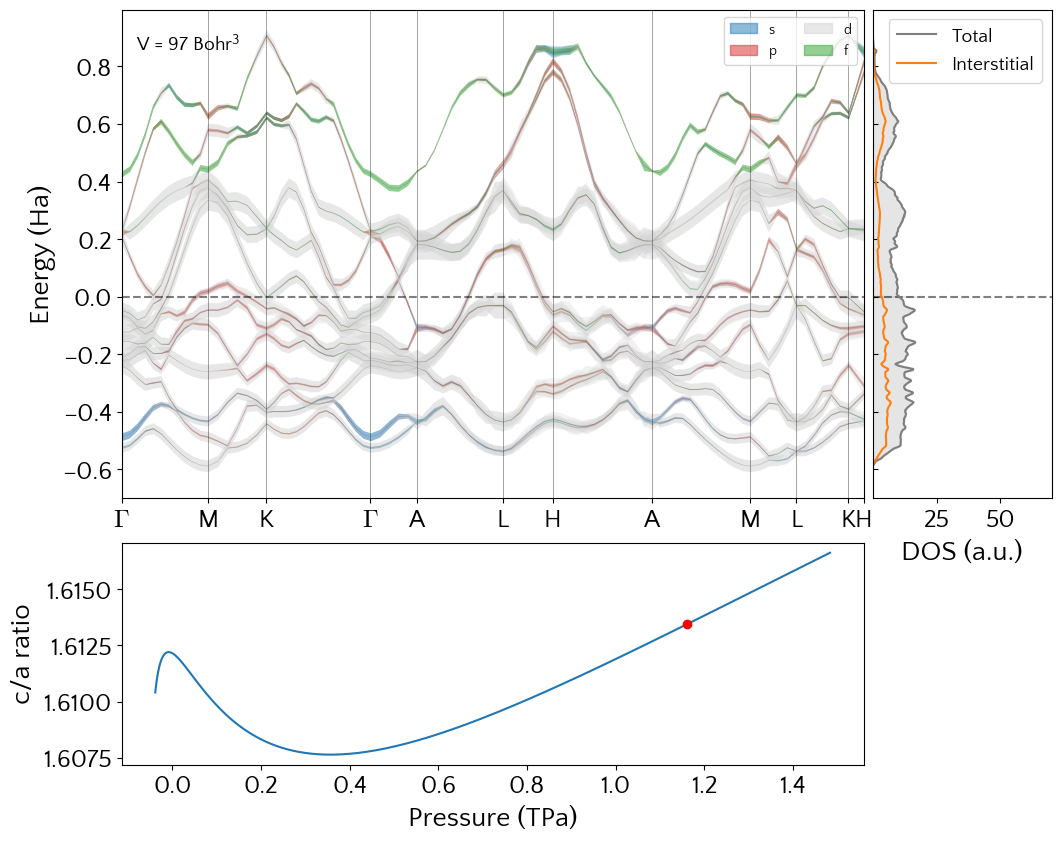

Substituting with a symbol from Computer Modern.


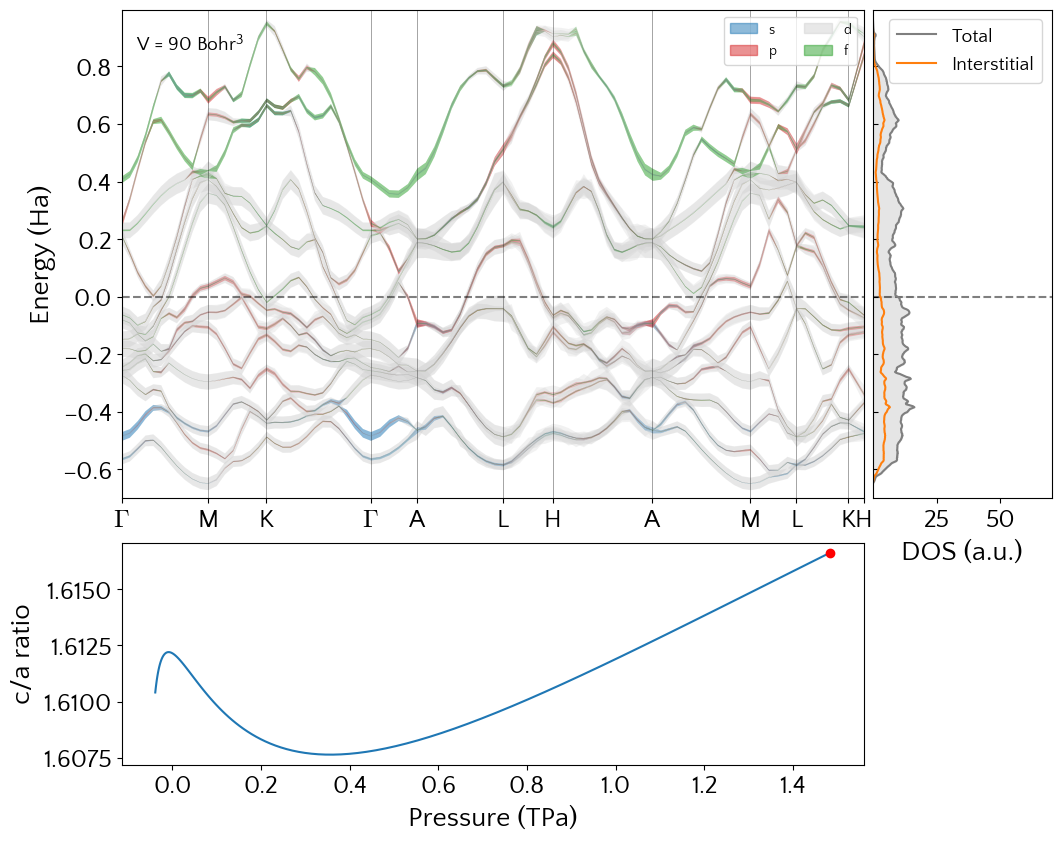

In [21]:
Volumes = [225, 211, 198, 184, 171, 157, 144, 130, 117, 103, 97, 90]
imageio.mimsave('./combined_plots.gif', [plot_bandsdiffL_dos_covera(i) for i in Volumes], fps=1)